(labs:cor23)=
# Filtering aliasing

<hr>

## 📌 Commentaires pour les intervenants

* Attention, comme il est question de crénelage (_aliasing_), il ne faut pas afficher les images dans le notebook avec `imshow`,
  car les images seront forcément affichées avec un zoom qu'on ne peut pas contrôler, et donc qui risque d'ajouter de l'aliasing...
  À la place, utiliser l'afficheur Linux de base après avoir enregistré les images, en veillant à avoir un zoom à 100 %.
  On peut d'ailleurs faire en sorte que cet afficheur soit toujours visible
  en cliquant sur la barre de titre de la fenêtre avec le bouton droit,
  puis en sélectionnant « Toujours au premier plan ».
  Tout ceci sera à faire en point oral aux étudiants.
  
* Un autre point oral à faire : expliquer comment fonctionne le masque à appliquer sur la TFD de l'image.
  Je pense qu'un petit schéma de ce masque, en expliquant les coordonnées du carré de 1 peut être intéressant.

<hr>

In [1]:
import numpy as np
import skimage.io as io
import skimage.filters as flt
import matplotlib.pyplot as plt

## Objectives
* Define and apply a filter for a real application
* Discover aliasing in images

**Warning**: because Jupyter Lab and Matplotlib show images with a rescaling, the function `imshow` can introduce aliasing,
even if there is no aliasing in the actual image.
Therefore, do not use `imshow` in this exercice, but save the image (with `skimage.io.imsave`) and display it by using an external viewer.

## Downsampling and filtering

Three images are generated:
* the original one, rescaled by a factor $S$,
* the original one, filtered by a Gaussian filter, then rescaled by a factor $S$,
* the original one, filtered by an ideal low-pass filter (defined in the Fourier domain), then rescaled by a factor $S$.

Note that when using the inverse Fourier transform, you may have to get the real part of the result, if it is complex.

In [2]:
# Original image
x = io.imread("roof.jpg")

In [3]:
# Scaling without low-pass filtering
y = x[::3,::3]
io.imsave("roof-none.png",y)

In [4]:
# Scaling with Gaussian filtering
x_filtered = flt.gaussian(x, 1.4)
y = x_filtered[::3,::3]
io.imsave("roof-gaussian.png",y)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
# Scaling with ideal low-pass filtering, in the Fourier domain

# Image FFT
X = np.fft.fft2(x)
X = np.fft.fftshift(X)

The mask is of the same size that the Fourier transform `X` of the original image.
The low frequencies must be 1 and the high frequency 0, as in the image below (the pixels 1 are in the center to manage the use of `fftshift`):

In [6]:
# Zero image
M, N = X.shape
Mask = np.zeros((M,N))

# Cutoff frequency (between 0 and 1)
f = .33

# Region where the filter equals 1
a = int(M/2*(1-f))
b = int(M/2*(1+f))
c = int(N/2*(1-f))
d = int(N/2*(1+f))
Mask[a:b,c:d] = 1

In [7]:
X_filtered = X*Mask
X_masked = X_filtered.copy() # for display

# Inverse FFT
X_filtered = np.fft.ifftshift(X_filtered)
x_filtered = np.fft.ifft2(X_filtered)
x_filtered = np.real(x_filtered)
y = x_filtered[::3,::3]

io.imsave("roof-ideal.png",y)

Lossy conversion from float64 to uint8. Range [-3.006420038667845, 275.1201794779874]. Convert image to uint8 prior to saving to suppress this warning.


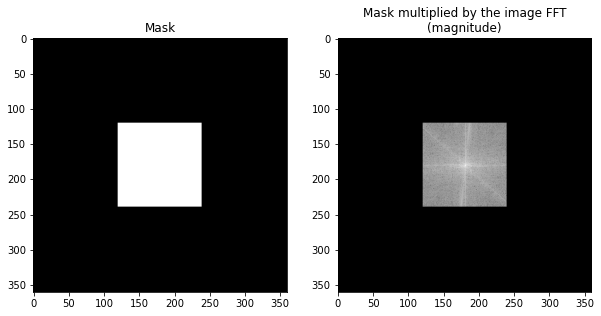

In [8]:
# Display the mask

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(Mask, cmap="gray")
axs[0].set_title("Mask")
axs[1].imshow(np.log(np.abs(X_masked)+1e-1), cmap="gray")
axs[1].set_title("Mask multiplied by the image FFT\n(magnitude)")
plt.show()

Note that the cutoff frequency equals $1/S$.

You should obtain the following results.
The aliasing is clearly visible on the first image, where no filter has been applied:
a weird effect is visible on the tiles.
The Gaussian filter strongly attenuates the effect, and the ideal filter is better.

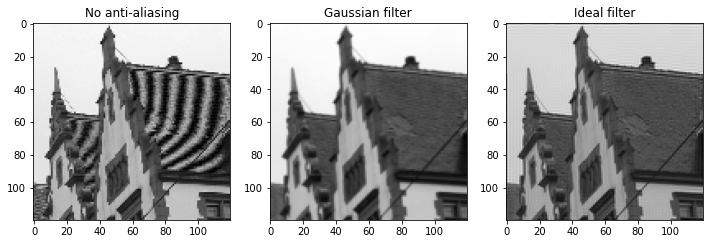

In [9]:
images = ["roof-none", "roof-gaussian", "roof-ideal"]
titles = ["No anti-aliasing", "Gaussian filter", "Ideal filter"]
fig, axs = plt.subplots(1, 3, figsize=(12,5))
for i in range(len(images)):
    x = io.imread(f"{images[i]}.png")
    axs[i].imshow(x, cmap="gray")
    axs[i].set_title(titles[i])
plt.show()